In [2]:
# PREAMBLE
import pandas as pd
import numpy as np
%matplotlib inline
import random
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.style.use('ggplot')
import seaborn as sns
import re
import io
import os.path
from ggplot import *

In [3]:
### Network I/O

# PROCESS SAR METRICS
FIND_ETH0 = re.compile(".+ ens3 .+")
FIND_CPU = re.compile(".+ all .+")
BW_COLS = ["run", "ts", "rxpck","txpck","rxkB","txkB"]
CPU_COLS = ["run", "cpu"]
SAMPLES = 5

network_df = lambda i: pd.read_fwf(io.StringIO("".join(map(lambda l: "s{}".format(i).ljust(10) + l, filter(FIND_ETH0.match, open(os.path.join("reports2","async_no_ssl_no_sse-network.{}.sar.txt".format(i))))))), header=None)\
                             .loc[:,[0,1,4,5,6,7]]
cpu_df = lambda i: pd.read_fwf(io.StringIO("".join(map(lambda l: "s{}".format(i).ljust(10) + l, filter(FIND_CPU.match, open(os.path.join("reports2", "async_yes_ssl_no_sse-cpu.{}.sar.txt".format(i))))))), header=None)\
                             .loc[:,[0,9]]

async_no_ssl_networks = tuple(network_df(i) for i in range(1,SAMPLES+1))
async_yes_ssl_networks = tuple(network_df(i) for i in range(1,SAMPLES+1))
async_yes_sse_networks = tuple(network_df(i) for i in range(1,SAMPLES+1))

async_no_ssl_cpus = tuple(cpu_df(i) for i in range(1, SAMPLES+1))
async_yes_ssl_cpus = tuple(cpu_df(i) for i in range(1, SAMPLES+1))
async_yes_sse_cpus = tuple(cpu_df(i) for i in range(1, SAMPLES+1))

for df in async_no_ssl_networks + async_yes_sse_networks + async_yes_ssl_networks:
    df.columns = BW_COLS

for df in async_no_ssl_cpus + async_yes_sse_cpus + async_yes_ssl_cpus:
    df.columns = CPU_COLS

async_no_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_no_ssl_cpus, 1)})
async_no_ssl_cpu.df_name = "no_ssl_cpu"
async_yes_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_ssl_cpus, 1)})
async_yes_ssl_cpu.df_name = "yes_ssl_cpu"
async_yes_sse_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_sse_cpus, 1)})
async_yes_sse_cpu.df_name = "yes_sse_cpu"

async_no_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_no_ssl_networks, 1)})
async_no_ssl_network.df_name = "no_ssl_network"
async_yes_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_ssl_networks, 1)})
async_yes_ssl_network.df_name = "yes_ssl_network"
async_yes_sse_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_sse_networks, 1)})
async_yes_sse_network.df_name = "yes_sse_network"

async_cpu = (async_no_ssl_cpu, async_yes_ssl_cpu, async_yes_sse_cpu)
async_network = (async_no_ssl_network, async_yes_ssl_network, async_yes_sse_network)

for df in async_cpu + async_network:
    df["sample_mean"] = df[list(map("s{}".format, range(1, SAMPLES+1)))].mean(1)

In [197]:
# PROCESS SAR METRICS
FIND_ETH0 = re.compile(".+ ens3 .+")
FIND_CPU = re.compile(".+ all .+")
BW_COLS = ["ts", "rxpck","txpck","rxkB","txkB"]
CPU_COLS = ["cpu"]
SAMPLES = 5

network_df = lambda fname: pd.read_fwf(io.StringIO("".join(filter(FIND_ETH0.match, open(fname)))), header=None)\
                             .loc[:,[0,3,4,5,6]]
cpu_df = lambda fname: pd.read_fwf(io.StringIO("".join(filter(FIND_CPU.match, open(fname)))), header=None)\
                             .loc[:,[8]]

async_no_ssl_networks = tuple(network_df(os.path.join("reports2", "async_no_ssl_no_sse-network.{}.sar.txt".format(i)))
                              for i in range(1,6))
async_yes_ssl_networks = tuple(network_df(os.path.join("reports2", "async_yes_ssl_no_sse-network.{}.sar.txt".format(i)))
                               for i in range(1,6))
async_yes_sse_networks = tuple(network_df(os.path.join("reports2", "async_yes_ssl_yes_sse-network.{}.sar.txt".format(i)))
                               for i in range(1,6))

async_no_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "async_no_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                          for i in range(1, SAMPLES+1))
async_yes_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "async_yes_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(1, SAMPLES+1))
async_yes_sse_cpus = tuple(cpu_df(os.path.join("reports2", "async_yes_ssl_yes_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(1, SAMPLES+1))

for df in async_no_ssl_networks + async_yes_sse_networks + async_yes_ssl_networks:
    df.columns = BW_COLS

for df in async_no_ssl_cpus + async_yes_sse_cpus + async_yes_ssl_cpus:
    df.columns = CPU_COLS

async_no_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_no_ssl_cpus, 1)})
async_no_ssl_cpu.df_name = "no_ssl_cpu"
async_yes_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_ssl_cpus, 1)})
async_yes_ssl_cpu.df_name = "yes_ssl_cpu"
async_yes_sse_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(async_yes_sse_cpus, 1)})
async_yes_sse_cpu.df_name = "yes_sse_cpu"

async_no_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_no_ssl_networks, 1)})
async_no_ssl_network.df_name = "no_ssl_network"
async_yes_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_ssl_networks, 1)})
async_yes_ssl_network.df_name = "yes_ssl_network"
async_yes_sse_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(async_yes_sse_networks, 1)})
async_yes_sse_network.df_name = "yes_sse_network"

#async_cpu = (async_no_ssl_cpu, async_yes_ssl_cpu, async_yes_sse_cpu)
#async_network = (async_no_ssl_network, async_yes_ssl_network, async_yes_sse_network)
async_cpu = [async_no_ssl_cpu, async_yes_ssl_cpu, async_yes_sse_cpu]
async_network = [async_no_ssl_network, async_yes_ssl_network, async_yes_sse_network]
for i in range(len(async_cpu)):
    df_name = async_cpu[i].df_name
    async_cpu[i]["t"] = async_cpu[i].index
    async_cpu[i] = pd.melt(async_cpu[i], ["t"], var_name="run", value_name=async_cpu[i].df_name)
    async_cpu[i].df_name = df_name
#    df["sample_mean"] = df[list(map("s{}".format, range(1, SAMPLES+1)))].mean(1)

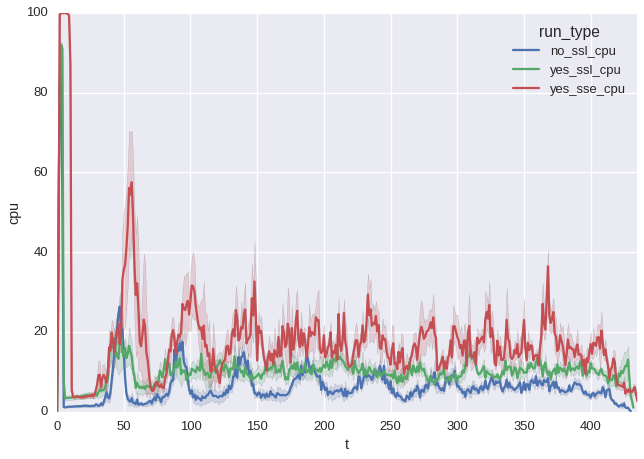

In [219]:
df = pd.melt(reduce(lambda x,y: pd.merge(x, y, on=["t","run"]), async_cpu), 
             id_vars=["t","run"],
             value_name="cpu",
             var_name="run_type",
)
sns.tsplot(data=df, time="t", unit="run", condition="run_type", value="cpu")

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/ggplot/stats/stat_smooth.py:22: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  data = data.sort(['x'])


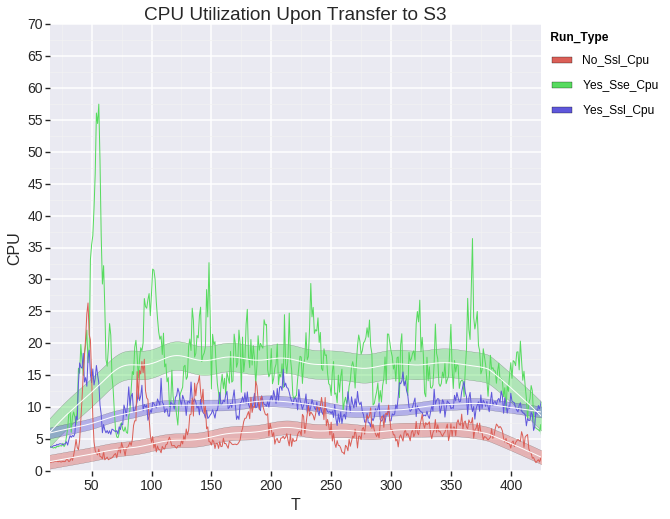

<ggplot: (-9223363290288570536)>

In [231]:
dff =  pd.groupby(df, by=["t","run_type"], exclusions=["run"]).aggregate(np.mean)
data=pd.melt(dff.T, value_name="cpu")
p = ggplot(aes(x='t', y='cpu', color='run_type', fill='run_type'), data=data)
s = p + geom_line() +\
    stat_smooth(colour='white', span=0.25) +\
    xlim(15,425) + ylim(0,70) + xlab("T") +\
    ylab("CPU") + ggtitle("CPU Utilization Upon Transfer to S3") +\
    theme_seaborn("darkgrid",context="talk")
#ggsave("/tmp/foo.png",s,dpi=96)
#data
s

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


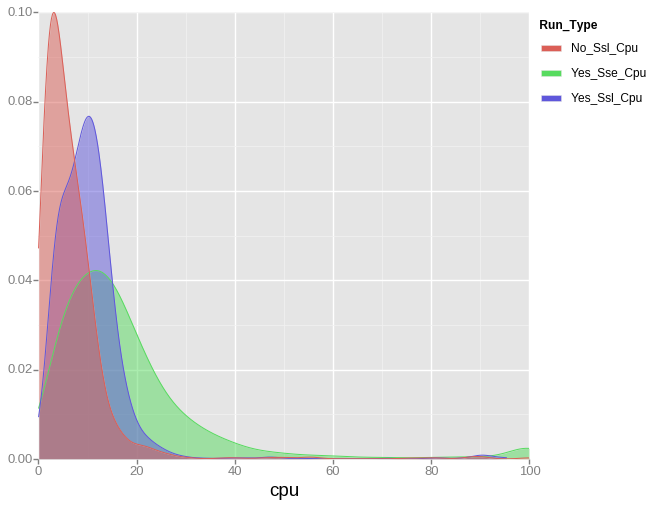

<ggplot: (8746566342187)>

In [236]:
ggplot(aes(x='cpu',  color='run_type', fill='run_type'), data=df) + geom_density(alpha=.5)

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


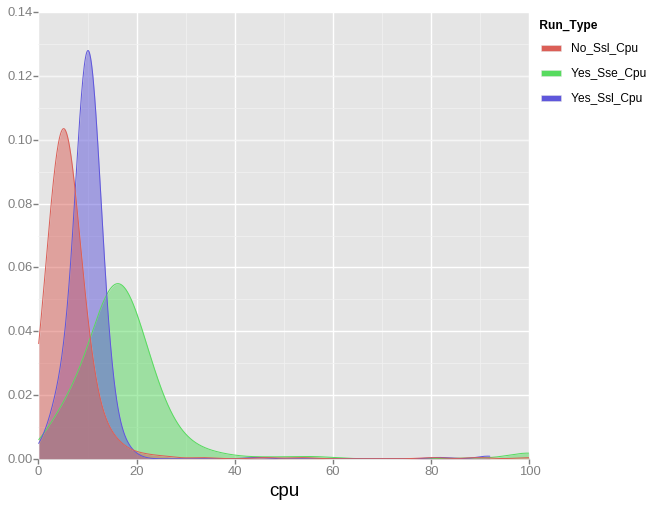

<ggplot: (-9223363290288341353)>

In [238]:
p=ggplot(aes(x='cpu',  color='run_type', fill='run_type'), data=data)
p+ geom_density(alpha=.5)

/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/home/psoutham/.apps/anaconda3/envs/bunnies/lib/python3.5/site-packages/ggplot/geoms/geom_bar.py:47: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  _reset = self.bottom == None or (self.ax != None and self.ax != ax)


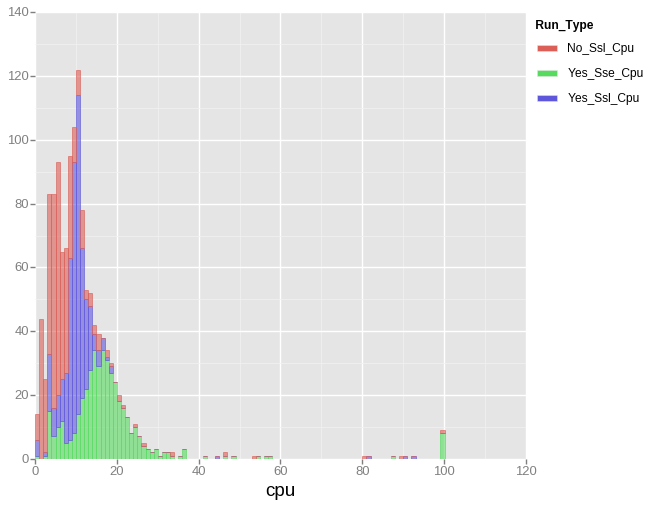

<ggplot: (8746544092785)>

In [261]:
p + geom_histogram(binwidth=1,alpha=.6) 

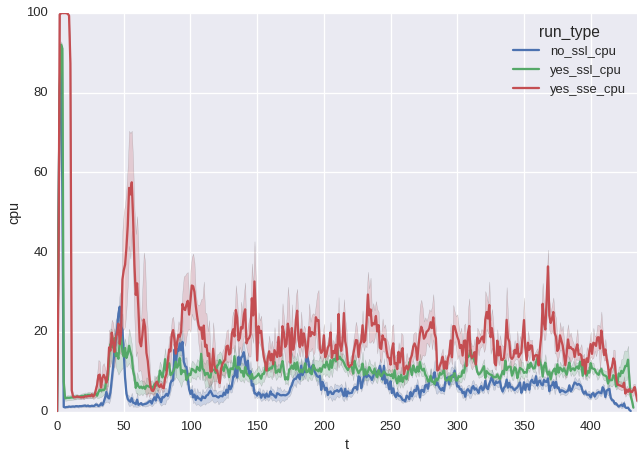

In [263]:
p = sns.tsplot(data=df, time="t", unit="run", value="cpu", condition="run_type")


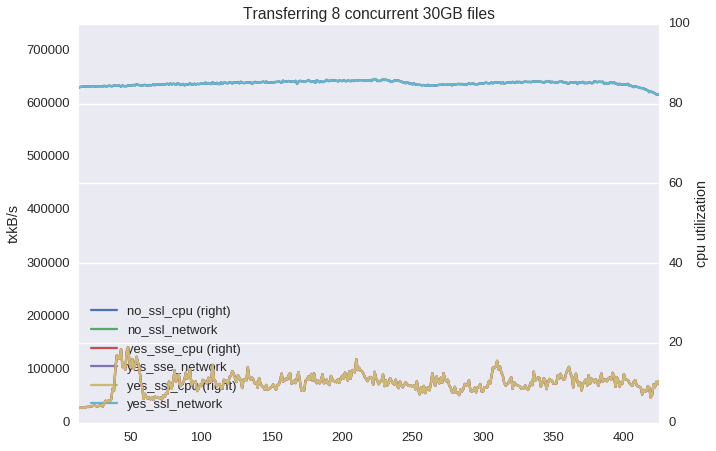

In [264]:
summary_plt = summary.plot(
    secondary_y=[df.df_name for df in async_cpu], 
    mark_right=True,
    #figsize=(16*2, 9*2)
)
summary_plt.set_ylabel("txkB/s")
summary_plt.set_ybound(0,750000)
summary_plt.right_ax.set_ylabel("cpu utilization")
summary_plt.right_ax.set_ybound(0,100)
summary_plt.set_title("Transferring 8 concurrent 30GB files")

#trend line for cpu

In [12]:
summary.mean()

no_ssl_cpu              9.976576
no_ssl_network     637761.608068
yes_sse_cpu             9.976576
yes_sse_network    637761.608068
yes_ssl_cpu             9.976576
yes_ssl_network    637761.608068
dtype: float64

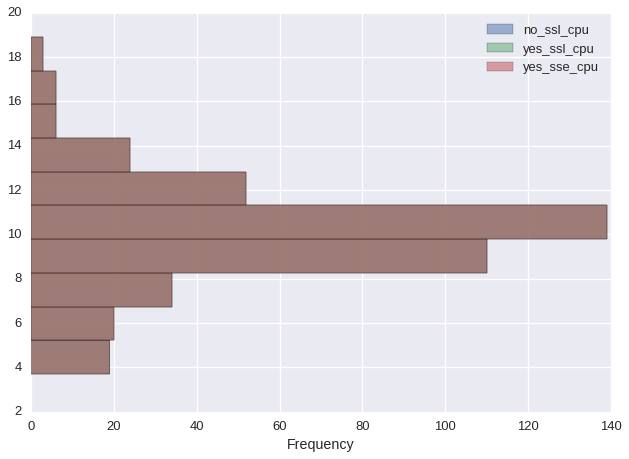

In [13]:
summary[[df.df_name for df in async_cpu]].plot.hist(
    stacked=False, 
    alpha=0.5,
    orientation='horizontal'
)

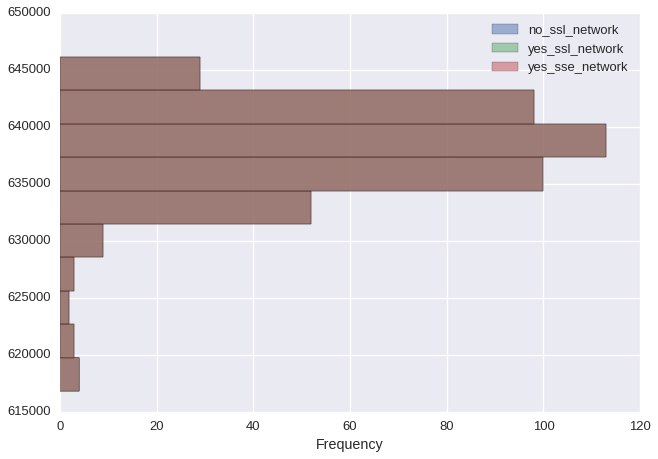

In [14]:
summary[[df.df_name for df in async_network]].plot.hist(
    stacked=False, 
    alpha=0.5,
    orientation='horizontal'
)

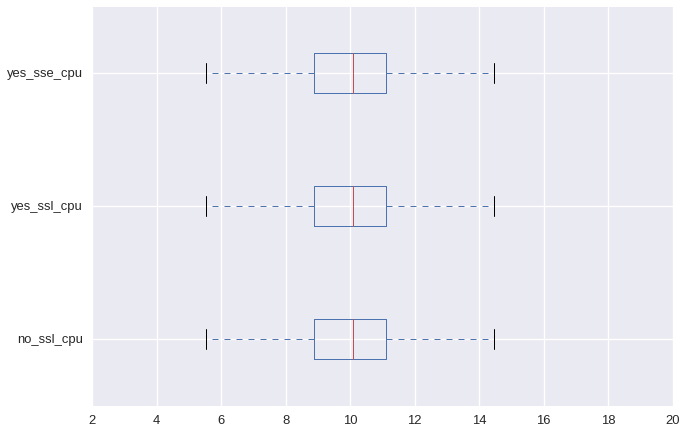

In [15]:
summary[[df.df_name for df in async_cpu]].plot.box(vert=False)

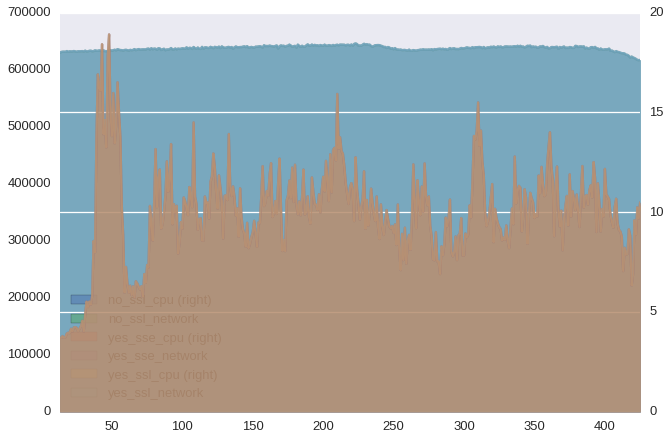

In [16]:
summary.plot.area(
    secondary_y=[df.df_name for df in async_cpu], 
    mark_right=True,
    alpha=.5,
    stacked=False
)

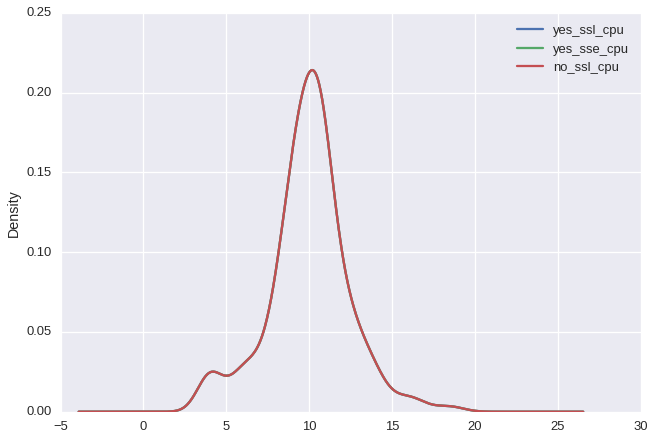

In [17]:
summary[["yes_ssl_cpu", "yes_sse_cpu", "no_ssl_cpu"]].plot.kde()
# change x value, use for bonnie++ test results

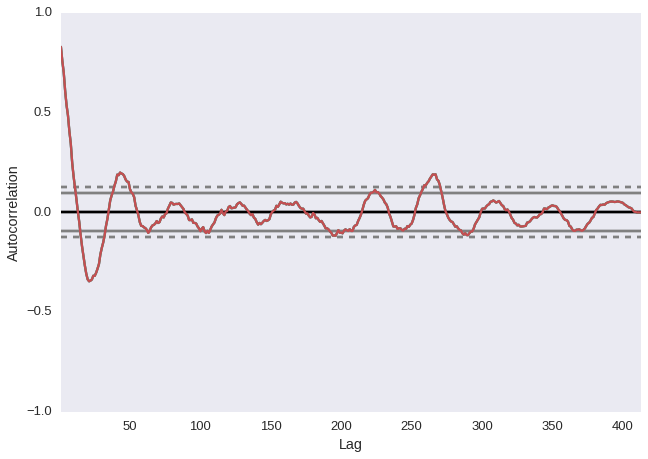

In [18]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(summary.yes_sse_cpu)
autocorrelation_plot(summary.yes_ssl_cpu)
autocorrelation_plot(summary.no_ssl_cpu)

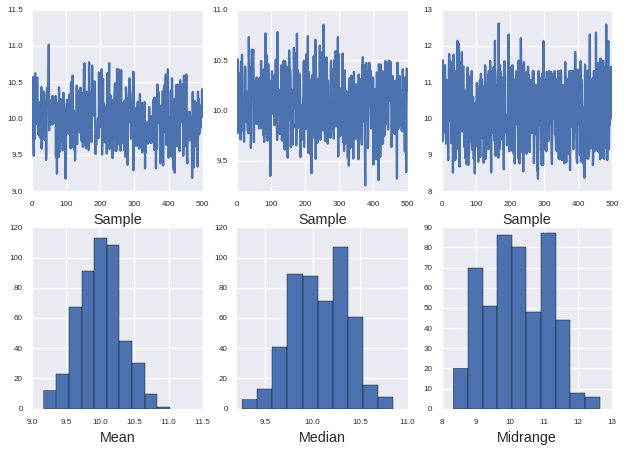

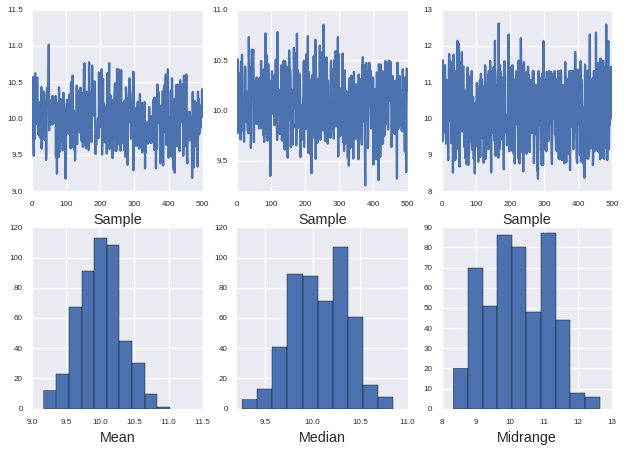

In [19]:
from pandas.tools.plotting import bootstrap_plot
bootstrap_plot(summary.yes_sse_cpu)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f47845b92b0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f478439fd30>], dtype=object)

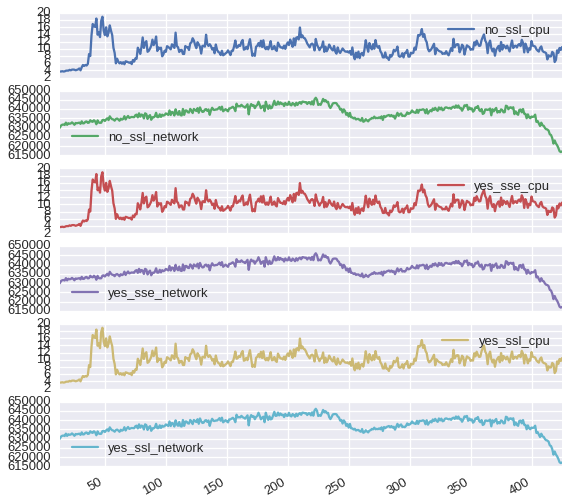

In [20]:
summary.plot(subplots=True, figsize=(9,9))

In [21]:
# PROCESS SAR METRICS
SAMPLES=8

single_no_ssl_networks = tuple(network_df(os.path.join("reports2", "single_no_ssl_no_sse-network.{}.sar.txt".format(i)))
                              for i in range(0, SAMPLES))
single_yes_ssl_networks = tuple(network_df(os.path.join("reports2", "single_yes_ssl_no_sse-network.{}.sar.txt".format(i)))
                               for i in range(0, SAMPLES))
single_yes_sse_networks = tuple(network_df(os.path.join("reports2", "single_yes_ssl_yes_sse-network.{}.sar.txt".format(i)))
                               for i in range(0, SAMPLES))

single_no_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "single_no_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                          for i in range(0, SAMPLES))
single_yes_ssl_cpus = tuple(cpu_df(os.path.join("reports2", "single_yes_ssl_no_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(0, SAMPLES))
single_yes_sse_cpus = tuple(cpu_df(os.path.join("reports2", "single_yes_ssl_yes_sse-cpu.{}.sar.txt".format(i)))
                           for i in range(0, SAMPLES))

for df in single_no_ssl_networks + single_yes_sse_networks + single_yes_ssl_networks:
    df.columns = BW_COLS

for df in single_no_ssl_cpus + single_yes_sse_cpus + single_yes_ssl_cpus:
    df.columns = CPU_COLS

single_no_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_no_ssl_cpus)})
single_no_ssl_cpu.df_name = "no_ssl_cpu"
single_yes_ssl_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_yes_ssl_cpus)})
single_yes_ssl_cpu.df_name = "yes_ssl_cpu"
single_yes_sse_cpu = pd.DataFrame({"s{}".format(i): 100-df.cpu for (i,df) in enumerate(single_yes_sse_cpus)})
single_yes_sse_cpu.df_name = "yes_sse_cpu"

single_no_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_no_ssl_networks)})
single_no_ssl_network.df_name = "no_ssl_network"
single_yes_ssl_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_yes_ssl_networks)})
single_yes_ssl_network.df_name = "yes_ssl_network"
single_yes_sse_network = pd.DataFrame({"s{}".format(i): df.txkB for (i,df) in enumerate(single_yes_sse_networks)})
single_yes_sse_network.df_name = "yes_sse_network"

single_cpu = (single_no_ssl_cpu, single_yes_ssl_cpu, single_yes_sse_cpu)
single_network = (single_no_ssl_network, single_yes_ssl_network, single_yes_sse_network)

for df in single_cpu + single_network:
    df["sample_mean"] = df[list(map("s{}".format, range(0, SAMPLES)))].mean(1)

FileNotFoundError: [Errno 2] No such file or directory: 'reports2/async_no_ssl_no_sse-network.reports2/single_no_ssl_no_sse-network.0.sar.txt.sar.txt'

In [ ]:
plt.figure()

single_summary = pd.DataFrame({df.df_name: df.sample_mean for df in single_cpu + single_network}).loc[5:90,]
single_summary_plt = single_summary.plot(
    secondary_y=[df.df_name for df in single_cpu], 
    mark_right=True,
    figsize=(16, 9)
)
single_summary_plt.set_ybound(0,400000)
single_summary_plt.set_ylabel("txkB/s")
single_summary_plt.right_ax.set_ylabel("cpu utilization")
single_summary_plt.right_ax.set_ybound(0,100)
single_summary_plt.set_title("Transferring 1 30GB file")

In [ ]:
single_summary.mean()

### Disk I/O

In [ ]:
samples = []
for dev in ("eph-p", "eph-e", "io-e", "io-p"): #"gpt-e", 
    with open(os.path.join("reports", "bonnie.{}.txt".format(dev)), "r") as f:
        samples.extend(dev.split("-") + l.strip().split(",") for l in f.readlines()[1:])

In [ ]:
bonnie = pd.DataFrame(samples)[[0,1,11, 12, 13,17, 18, 39, 40,]+list(range(42,50))]
bonnie.columns=["dev_type", "enc_flag", "put_block", "put_block_cpu", "rewrite", "get_block",
"get_block_cpu", "put_block_latency","rewrite_latency",
"get_block_latency","seeks_latency","seq_create_latency","seq_stat_latency","seq_del_latency","ran_create_latency","ran_stat_latency","ran_del_latency"]

for l in ("put_block", "get_block", "put_block_cpu", "get_block_cpu"):
    bonnie[l] = bonnie[l].apply(int)
    
for l in ("put_block_latency", "get_block_latency"):
    bonnie[l] = bonnie[l].apply(lambda x: int(x[:-2]) if x[-2:] == "us" else int(x[:-2])*1000)


In [ ]:
bonnie.boxplot(by=["dev_type", "enc_flag"], 
           column=["put_block", "get_block"], 
           figsize=(16,9))

In [ ]:
bonnie[bonnie.dev_type == "eph"].boxplot(by="enc_flag", 
           column=["put_block", "get_block"],           
           figsize=(16,9))

In [ ]:
bonnie[bonnie.dev_type == "io"].boxplot(by="enc_flag", 
           column="get_block",           
           figsize=(16,9))

In [ ]:
g = sns.factorplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie,
                  kind="bar", size=9,palette=['r','g'])
g.despine(left=True)

In [ ]:
g = sns.factorplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie,
                  kind="bar", size=9,palette=['r','g'])
g.despine(left=True)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block_cpu", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'],width=.7)
g.set_title("Ephemerial relative CPU on READ\nLUKS(e) vs PlainText(p)")
g.set_ybound(5,15)
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block_cpu", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative CPU on WRITE\nLUKS(e) vs PlainText(p)")
g.set_ybound(25,35)
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "io"],palette=['g','r'], width=.8)
g.set_title("EBS relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "io"],palette=['g','r'], width=.8)
g.set_title("EBS relative Throughput on WRITE\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="put_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative Throughput on WRITE\nLUKS(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
sns.reset_defaults()
sns.set_style("whitegrid")
g = sns.boxplot(x="dev_type", y="get_block", hue="enc_flag", data=bonnie[bonnie.dev_type == "eph"],palette=['r','g'], width=.8)
g.set_title("Ephemerial relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
sns.despine(offset=5)

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 9))
_ = fig.suptitle("bonnie tests")
g_er = sns.boxplot(x="dev_type", y="get_block",
                hue="enc_flag", 
                data=bonnie[bonnie.dev_type == "eph"],
                palette=['r','g'],
                width=.8,
                ax=axes[0, 0])
g_er.set_title("Ephemerial relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
g_er.set_xlabel("")
g_er.set_ylabel("blocks/sec")
g_ew = sns.boxplot(x="dev_type", y="put_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "eph"],
                palette=['r','g'],
                width=.8,
                ax=axes[0, 1])
g_ew.set_title("Ephemerial relative Throughput on WRITE\nLUKS(e) vs PlainText(p)")
g_ew.set_xlabel("")
g_ew.set_ylabel("blocks/sec")

g_ir = sns.boxplot(x="dev_type", y="get_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "io"],
                palette=['g','r'],
                width=.8,
                ax=axes[1, 0]
               )
g_ir.set_title("EBS relative Throughput on READ\nEncrypted(e) vs PlainText(p)")
g_ir.set_xlabel("")
g_ir.set_ylabel("blocks/sec")

g_iw = sns.boxplot(x="dev_type", y="put_block",
                hue="enc_flag",
                data=bonnie[bonnie.dev_type == "io"],
                palette=['g','r'],
                width=.8,
                ax=axes[1, 1]
               )
g_iw.set_title("EBS relative Throughput on WRITE\nEncrypted(e) vs PlainText(p)")
g_iw.set_xlabel("")
g_iw.set_ylabel("blocks/sec")

sns.despine(offset=5)
fig.subplots_adjust(hspace=0.4)